In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
user_data = pd.read_csv('C:\\Users\\АЛСУ\\Downloads\\Users/3_user_data.csv')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
user_data.shape

(2954, 3)

In [5]:
user_data.isna()

,client,premium,age
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2949,False,False,False
2950,False,False,False
2951,False,False,False
2952,False,False,False


In [6]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [16]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [18]:
logs = pd.read_csv('C:\\Users\\АЛСУ\\Downloads\\Users/3_logs.csv')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [26]:
logs.platform.nunique()

3

In [19]:
logs.shape

(4500, 4)

In [20]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [22]:
logs.isna()

,client,success,platform,time
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4495,False,False,False,False
4496,False,False,False,False
4497,False,False,False,False
4498,False,False,False,False


In [21]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

     Перечислим идентификаторы пользователей, которые совершили наибольшее число успешных действий  в порядке возрастания. 

In [37]:
successful_client = logs \
    .query("success == True") \
    .groupby(['client'], as_index = False) \
    .agg({'success': 'count'}) \
    .sort_values(['success'], ascending = False)
successful_client 

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [42]:
maximum_success = successful_client.success.max() 
maximum_success

41

In [47]:
df = successful_client.query("success == 41") \
    .sort_values('client') \
    .client \
    .tolist() #извлекаем список
df

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

                      С какой платформы осуществляется наибольшее количество успешных операций

In [49]:
successful_platform = logs \
    .query("success == True") \
    .groupby(['platform'], as_index = False) \
    .agg({'success': 'count'}) \
    .sort_values(['success'], ascending = False)
successful_platform
#наибольшее количество успешных операций совершается с телефона

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


                            Какая платформа наиболее популярна среди премиумных клиентов?

In [51]:
user_data_logs = user_data \
    .merge(logs, on = 'client')
user_data_logs.head()
#Объединим два датасета

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [59]:
premium_clients_platform = user_data_logs \
    .query("premium ==True and success == True") \
    .groupby(['platform'], as_index = False) \
    .agg({'success': 'count'}) \
    .sort_values('success', ascending = False)
premium_clients_platform
#Среди премиумных клиентов наиболее популярна платформа 'phone'

,platform,success
1,phone,177
0,computer,108
2,tablet,18


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

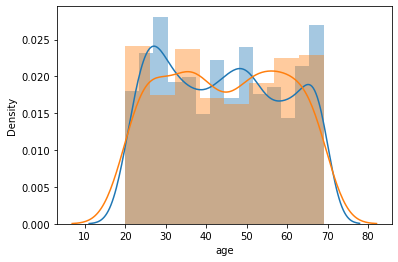

In [70]:
#Визуализация распределения возраста клиентов в зависимости от типа клиента (премиум или нет)
sns.distplot(user_data_logs.query("premium == False").age)
sns.distplot(user_data_logs.query("premium == True").age)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

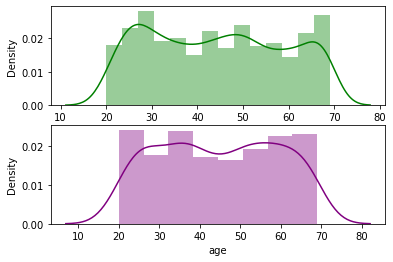

In [74]:
fig, ax = plt.subplots(nrows=2, ncols = 1) #задаем число строк и число колонок. Назначаем две переменные fig и ax
sns.distplot(user_data_logs.query("premium == False").age, ax = ax[0], color = 'green')
sns.distplot(user_data_logs.query("premium == True").age, ax = ax[1], color = 'purple')


In [95]:
#Считаем число успешных операций
x = user_data_logs \
    .groupby(['client'], as_index = False) \
    .agg({'success': 'sum'}) 
    
x.success.sum()

2547

In [99]:
x

,client,success
0,40,1
1,75,1
2,81,1
3,132,1
4,164,1
...,...,...
2949,99926,1
2950,99927,1
2951,99931,1
2952,99952,0


In [96]:
#Количество клиентов, совершивших успешные операции
y = x.client.count()
y

2954

<AxesSubplot:ylabel='Density'>

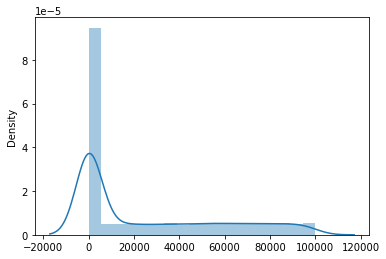

In [101]:
sns.distplot(x)

             
                 Находим число успешных операций, сделанных на платформе computer, в зависимости от возраста


In [103]:
user_data_logs

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [116]:
#Количество успешных операций в каждой возрастной группе
success_comp = user_data_logs \
    .query("success == True and platform == 'computer'") \
    .groupby(['age'], as_index = False) \
    .agg({'success': 'sum'})
success_comp

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26
5,25,33
6,26,14
7,27,14
8,28,49
9,29,17


                     Клиенты какого возраста совершили наибольшее количество успешных действий с компьютера?

In [124]:
success_comp.sort_values(['success'], ascending = False)
# Наибольшее количество успешных действий совершили 28-летние клиенты

,age,success
8,28,49
29,49,33
5,25,33
12,32,27
48,68,26
4,24,26
49,69,24
45,65,23
32,52,22
34,54,22


In [125]:
#Число успешных операций
a = success_comp.success.sum()
a

843

<AxesSubplot:xlabel='age', ylabel='success'>

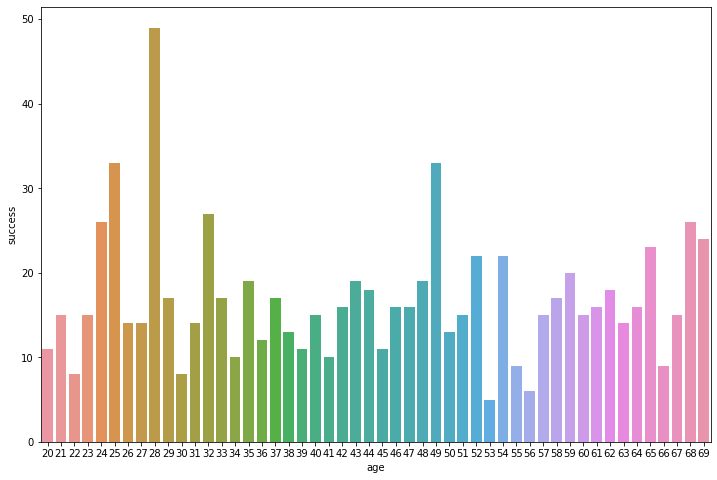

In [118]:
#Визуализиция числа успешных операций, сделанных на платформе computer
plt.figure(figsize = (12,8))
sns.barplot(x = success_comp.age, y = success_comp.success)

                                 Сделаем тот же график с помощью sns.countplot

In [127]:
b = user_data_logs \
    .query("success == True and platform == 'computer'")
b

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

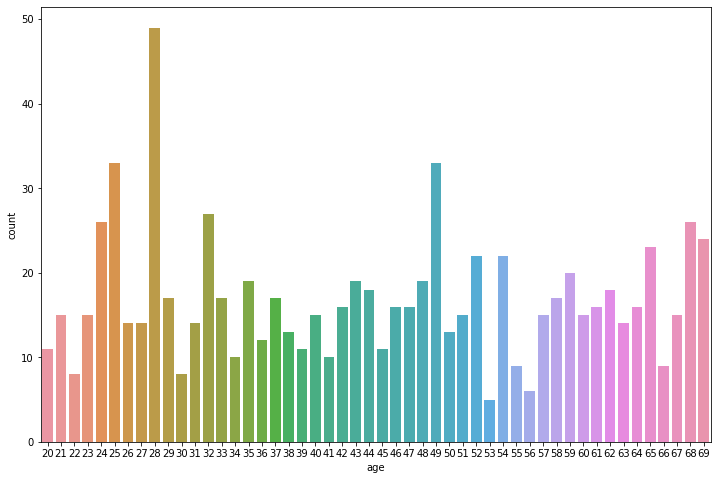

In [131]:
plt.figure(figsize = (12,8))
sns.countplot(b.age)